# CP4 - Data Science

Aluno: Mateus Iago

### Importando Pacotes

In [1]:
#Carregando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import yfinance as yf
import warnings

#Carregando a base de dados
dados = pd.read_excel('CP4 Time Series.xlsx')

### Exercício 1

In [3]:
#Definindo o index para a coluna Data 

dados = dados.set_index('Data', drop=True)

#Definindo o período para Mês
dados.index = dados.index.to_period('M').to_timestamp('M')
print(dados.head())

            Produção total de autoveículos  \
Data                                         
1995-01-31                           78192   
1995-02-28                          110168   
1995-03-31                          131859   
1995-04-30                          117064   
1995-05-31                          136548   

            Produção de automóveis e comerciais leves  Produção de caminhões  \
Data                                                                           
1995-01-31                                      71726                   5166   
1995-02-28                                     102750                   5853   
1995-03-31                                     123153                   7117   
1995-04-30                                     109106                   6410   
1995-05-31                                     128367                   6722   

            Produção de ônibus  Produção de motociclos  \
Data                                                     


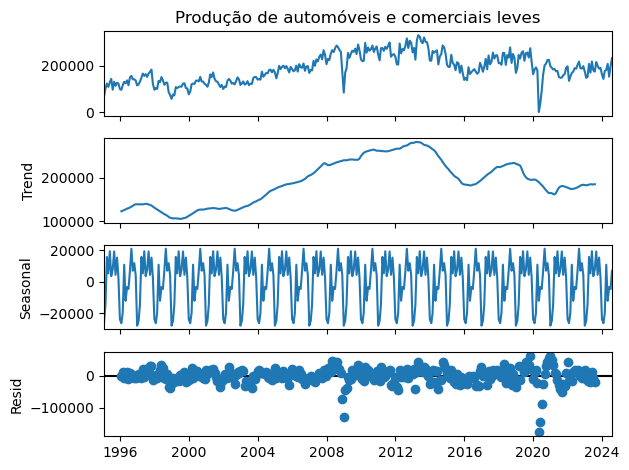

In [4]:
#A)
#Utilizando a função seasonal_decompose e um período de 24 meses (period=24), 
#explique se há alguma tendência clara de longo prazo na produção dos veículos e se há 
#sazonalidade nesta variável.

decomposicao = seasonal_decompose(dados['Produção de automóveis e comerciais leves'], model = 'additive', period = 24)

decomposicao.plot()
plt.show()

#Apesar de algumas quedas, existe uma tendência de alta
#gráfico mostra claramente um componente sazonal. A série exibida apresenta um padrão repetitivo em intervalos regulares, com picos e vales recorrentes ao longo do tempo, caracterizando um comportamento sazonal.

In [5]:
#B)
# Com a função adfuller, realize o teste de estacionariedade para a variável de produção 
#de veículos. A série é estacionária? Se a série não for estacionária, realize o teste de 
#estacionariedade para a primeira diferença da sua série. Após a realização do teste, a série 
#resultante é estacionária?

# Função para testar estacionariedade
def teste_ADF(serie):
    resultado_adf = adfuller(serie.dropna())
    print(f'Estatística ADF: {resultado_adf[0]}')
    print(f'P-valor: {resultado_adf[1]}')
    if resultado_adf[1] < 0.05:
        print('A série é estacionária')
    else:
        print('A série NÃO é estacionária')

# Testando a série original
print("Teste ADF para a série original:")
teste_ADF(dados['Produção de automóveis e comerciais leves'])

# Testando a série diferenciada
print("\nTeste ADF para a série diferenciada:")
teste_ADF(dados['Produção de automóveis e comerciais leves'].diff())

#A Série original não é estacionaria
#A Série diferenciada é estacionaria

Teste ADF para a série original:
Estatística ADF: -1.8800483704430806
P-valor: 0.34150440492774103
A série NÃO é estacionária

Teste ADF para a série diferenciada:
Estatística ADF: -7.4119395270994515
P-valor: 7.09639911245177e-11
A série é estacionária


In [6]:
#C)
# Antes de fazer as projeções, é necessário testar que modelo melhor se adequa aos dados. 
#Utilize a função ARIMA para testar modelos com as ordens (1, 1, 1), (2, 1, 2) e (12, 1, 12). 
#Com base no critério BIC, qual destes modelos é o mais indicado para realizar a projeção da 
#série futura

#Modelo ARIMA (1,1,1)
model1 = ARIMA(dados['Produção de automóveis e comerciais leves'], order=(1, 1, 1))
model1_fit = model1.fit()

#Modelo ARIMA (2,1,2)
model2 = ARIMA(dados['Produção de automóveis e comerciais leves'], order=(2, 1, 2))
model2_fit = model2.fit()

#Modelo ARIMA (12,1,12)
model3 = ARIMA(dados['Produção de automóveis e comerciais leves'], order=(12, 1, 12))
model3_fit = model3.fit()


#BIC Modelos
print('BIC para o modelo ARIMA(1,1,1)')
print(model1_fit.bic)

print('BIC para o modelo ARIMA(2,1,2)')
print(model2_fit.bic)

print('BIC para o modelo ARIMA(12,1,12)')
print(model3_fit.bic)

#com base no critério BIC, o modelo ARIMA(1,1,1) é o mais adequado entre os modelos comparados

C:\Users\mateu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mateu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\mateu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mateu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible start

BIC para o modelo ARIMA(1,1,1)
8240.117200230614
BIC para o modelo ARIMA(2,1,2)
8250.565350967072
BIC para o modelo ARIMA(12,1,12)
8298.22668433464


C:\Users\mateu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [7]:
#D)
#Utilizando o melhor modelo ARIMA com base nos critérios mencionados, realize a 
#projeção da quantidade de veículos produzidos com a função .forecast. Quantos veículos 
#devem ser produzidos em dezembro de 2024?

forecast = model1_fit.forecast(steps=5) 

print('Valores históricos')
print(dados['Produção de automóveis e comerciais leves'].tail())
print('Valores previstos')
print(forecast)

# De acordo com o forecast, a produçãp de automoveis comerciais leves em dezembro de 2024 será de 198.236 veiculos 

Valores históricos
Data
2024-03-31    181901
2024-04-30    207651
2024-05-31    152829
2024-06-30    196160
2024-07-31    232616
Freq: M, Name: Produção de automóveis e comerciais leves, dtype: int64
Valores previstos
2024-08-31    217553.657556
2024-09-30    208600.876326
2024-10-31    203279.506689
2024-11-30    200116.581774
2024-12-31    198236.596976
Freq: M, Name: predicted_mean, dtype: float64


### Exercício 2

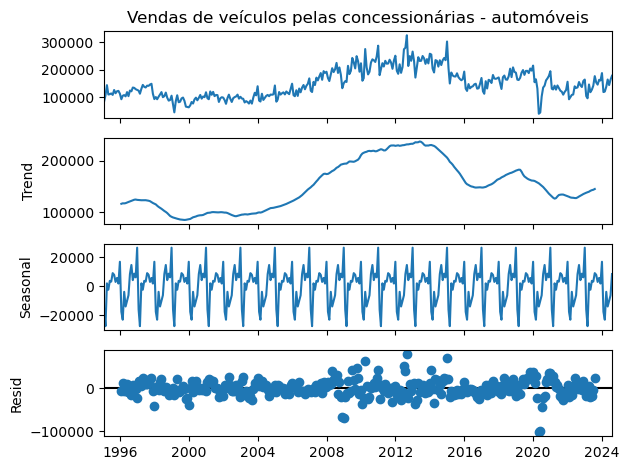

In [8]:
#A)
#Analise a série de vendas de veículos correspondente e responda às seguintes questões:
#Utilizando a função seasonal_decompose e um período de 24 meses (period=24), 
#explique se há alguma tendência clara de longo prazo na venda dos veículos e se há 
#sazonalidade nesta variável.

decomposicao2 = seasonal_decompose(dados['Vendas de veículos pelas concessionárias - automóveis'], model = 'additive', period = 24)

decomposicao2.plot()
plt.show()

#O gráfico apresentas uma tendência de alta, podemos identificar que logo apos o vale, ele se inclina novamente e esse comportamente se repete na ultima seção do gráfico
#gráfico mostra claramente um componente sazonal. A série exibida apresenta um padrão repetitivo em intervalos regulares, com picos e vales recorrentes ao longo do tempo, caracterizando um comportamento sazonal.

In [9]:
#B)
#Com a função adfuller, realize o teste de estacionariedade para a variável de vendas de 
#veículos. A série é estacionária? Se a série não for estacionária, realize o teste de 
#estacionariedade para a primeira diferença da sua série. Após a realização do teste, a série 
#resultante é estacionária?

# Função para testar estacionariedade
def teste_ADF(serie):
    resultado_adf = adfuller(serie.dropna())
    print(f'Estatística ADF: {resultado_adf[0]}')
    print(f'P-valor: {resultado_adf[1]}')
    if resultado_adf[1] < 0.05:
        print('A série é estacionária')
    else:
        print('A série NÃO é estacionária')

# Testando a série original
print("Teste ADF para a série original:")
teste_ADF(dados['Vendas de veículos pelas concessionárias - automóveis'])

# Testando a série diferenciada
print("\nTeste ADF para a série diferenciada:")
teste_ADF(dados['Vendas de veículos pelas concessionárias - automóveis'].diff())

#A Série original não é estacionaria
#A Série diferenciada é estacionaria

Teste ADF para a série original:
Estatística ADF: -1.3957645873806335
P-valor: 0.5843049357371186
A série NÃO é estacionária

Teste ADF para a série diferenciada:
Estatística ADF: -7.228315491612183
P-valor: 2.0255147933622203e-10
A série é estacionária


In [10]:
#C)
#Antes de fazer as projeções, é necessário testar que modelo melhor se adequa aos dados. 
#Utilize a função ARIMA para testar modelos com as ordens (1, 1, 1), (2, 1, 2) e (12, 1, 12). 
#Com base no critério BIC, qual destes modelos é o mais indicado para realizar a projeção da 
#série futura?

#Modelo ARIMA (1,1,1)
model1 = ARIMA(dados['Vendas de veículos pelas concessionárias - automóveis'], order=(1, 1, 1))
model1_fit = model1.fit()

#Modelo ARIMA (2,1,2)
model2 = ARIMA(dados['Vendas de veículos pelas concessionárias - automóveis'], order=(2, 1, 2))
model2_fit = model2.fit()

#Modelo ARIMA (12,1,12)
model3 = ARIMA(dados['Vendas de veículos pelas concessionárias - automóveis'], order=(12, 1, 12))
model3_fit = model3.fit()


#BIC Modelos
print('BIC para o modelo ARIMA(1,1,1)')
print(model1_fit.bic)

print('BIC para o modelo ARIMA(2,1,2)')
print(model2_fit.bic)

print('BIC para o modelo ARIMA(12,1,12)')
print(model3_fit.bic)

#com base no critério BIC, o modelo ARIMA(2,1,2) é o mais adequado entre os modelos comparados

BIC para o modelo ARIMA(1,1,1)
8151.609062072373
BIC para o modelo ARIMA(2,1,2)
8151.164938504635
BIC para o modelo ARIMA(12,1,12)
8163.8631366828695


C:\Users\mateu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
#D)
#Utilizando o melhor modelo ARIMA com base nos critérios mencionados, realize a 
#projeção da quantidade de veículos vendidos com a função .forecast. Quantos veículos devem 
#ser produzidos em dezembro de 2024? Em dezembro de 2024, haverá mais veículos 
#produzidos ou vendidos?

forecast = model2_fit.forecast(steps=5) 

print('Valores históricos')
print(dados['Vendas de veículos pelas concessionárias - automóveis'].tail())
print('Valores previstos')
print(forecast)

#De acordo com as previsões em dezembro de 2024 serão vendidos 156.699 veículos pelas concessionárias
#Comparando a previsão de produção de veículos para dezembro de 2024, que foi estimada em 198.236 unidades, com a previsão de vendas, que é de 156.699 unidades, podemos concluir que serão produzidos mais veículos do que vendidos.

Valores históricos
Data
2024-03-31    137889
2024-04-30    164335
2024-05-31    144014
2024-06-30    163799
2024-07-31    178047
Freq: M, Name: Vendas de veículos pelas concessionárias - automóveis, dtype: int64
Valores previstos
2024-08-31    159659.098538
2024-09-30    159896.493189
2024-10-31    156481.012201
2024-11-30    157842.300876
2024-12-31    156699.451540
Freq: M, Name: predicted_mean, dtype: float64


### Exercício 3

In [12]:
#Carregando a base de dados
alunos = pd.read_csv('CP4 Data Cleaning.csv')

In [13]:
#Conferindo os valores nulos
valores_nulos = alunos.isnull().sum()
print(valores_nulos)

#Podemos ver que na coluna do meu RM temos 1995 valores nulos

Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64


In [22]:
#A)
#A coluna de variável do aluno apresenta alguns valores incorretos. A variável ‘Study 
#Hours per Week’ pode variar de 0 a 20, a variável ‘Attendance Rate’ pode variar de 25 a 100
#e a variável ‘Previous Grades’ pode variar de 25 a 100. Valores acima ou abaixo destes limites 
#estão incorretos. Sendo assim, calcule a média da coluna que você deve avaliar (Tabela de 
#Variáveis) e, após substituir os valores que estão acima do limite pelo valor máximo esperado 
#e os valores que estão abaixo do limite pelo valor mínimo esperado, calcule uma nova média 
#para a referida coluna. Em seguida, foi observado também que a coluna possui valores 
#faltantes (NAs). Pede-se que você substitua estes valores pela média da coluna.

#Calculando a média original
media_original = alunos['Study Hours per Week'].mean()
print(f'Média original: {media_original}')

# Definindo os limites
limite_inferior = 0
limite_superior = 20

#Clonando o df original
alunos_corrigido = alunos.copy()

#Substituir valores fora dos limites
alunos_corrigido['Study Hours per Week'] = alunos_corrigido['Study Hours per Week'].apply(
    lambda x: limite_superior if x > limite_superior else limite_inferior if x < limite_inferior else x
)

#Calcular a média após substituição de valores fora dos limites
media_corrigida = alunos_corrigido['Study Hours per Week'].mean()
print(f'Média corrigida: {media_corrigida}')

#Substituir valores faltantes na cópia pela nova média
alunos_corrigido['Study Hours per Week'].fillna(media_corrigida, inplace=True)

#Conferindo se existe valores nulos
valores_nulos_2 = alunos_corrigido.isnull().sum()
print(valores_nulos_2)


#A média antes das alterações era de : 9.962744375740034
#A média depois das alterações foi de: 9.967422707538482

#A coluna possuia 1995 valores nulos
#Após as substituições a coluna ficou com 0 Valores nulos

Média original: 9.962744375740034
Média corrigida: 9.967422707538482
Student ID                                        0
Study Hours per Week                              0
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64


In [21]:
#B)
#Em seguida, foi observado que a contagem de observações para cada categoria da coluna 
#‘Parent Education Level’ parece um pouco fora do padrão. Esta coluna classifica a formação 
#dos pais dos alunos, indo de ‘High School’ a ‘Doctorate’. Descubra o que há de errado nesta 
#coluna, manipule a coluna de forma a normalizar os dados e gere uma nova contagem do 
#número de observações de cada categoria (não é necessário fazer nenhuma modificação nos 
#NAs)

#Pelo oque pude analisar, o data set possui valores NaN na coluna Parent Education Level além de ter registros em caixa alta, registros em caixa baixa e registros que mesclam
#Para Corrigir esses problemas e normalizar a coluna, passaremos todos os registros para caixa baixa e substituiremos NaN por Unkown (desconhecido)

#Na célula anterior podemos perceber que a coluna Parent Education Level possui 2000 valores nulos

#Função para normalizar
def caixa_baixa(educacao):
    # Verificar se o valor é uma string
    if isinstance(educacao, str):
        return educacao.strip().lower()
    else:
        # Retornar o valor como está se não for uma string
        return educacao

#Aplicando as mudanças
alunos_corrigido['Parent Education Level'] = alunos_corrigido['Parent Education Level'].apply(caixa_baixa)

#Substituindo valores nulos por Unknown
alunos_corrigido['Parent Education Level'] = alunos_corrigido['Parent Education Level'].fillna('Unknown')

#Contagem de valores
print(alunos_corrigido['Parent Education Level'].value_counts())

Parent Education Level
bachelor       7685
high school    7675
doctorate      7610
associate      7604
master         7426
unknown        2000
Name: count, dtype: int64


In [20]:
#Como podemos ver,  no data set que modificamos no exercicio A e B, nao existe mais valores Nulos nas colunas Parent Education Level e Study Hours per Week  
valores_nulos2 = alunos_corrigido.isnull().sum()
print(valores_nulos2)

Student ID                                        0
Study Hours per Week                              0
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                            0
Passed                                         2000
dtype: int64


In [17]:
#FIM